# Problem 2

In [129]:
import scipy.io
import numpy as np
from sklearn.cluster import KMeans
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color
from scipy import ndimage as ndi
from scipy.signal import convolve2d
%matplotlib inline
plt.style.use('dark_background')


In [2]:
def kmeans_segmentation(img_path):
    image = imageio.imread(img_path)
    image_3d = image.reshape(-1,3)
    
    # leaning dictionary 
    kmeans = KMeans(n_clusters=10,max_iter=1000, random_state=0)
    kmeans.fit(image_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans

In [3]:
mountain_kmeans = kmeans_segmentation("./Problem2/mountain.jpg")
zebra_kmeans = kmeans_segmentation("./Problem2/zebra.jpg")

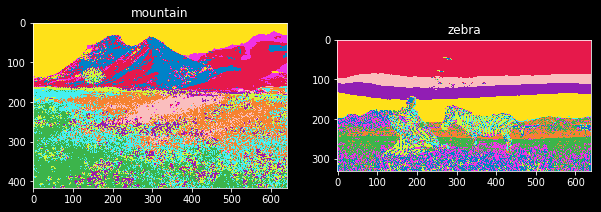

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_kmeans)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_kmeans)
plt.show()

In [14]:
def kmeans_segmentation_lab(img_path):
    image = imageio.imread(img_path)
    image = color.rgb2lab(image)
    image_lab = image
    image_3d = image.reshape(-1,3)
    
    # leaning dictionary 
    kmeans = KMeans(n_clusters=10,max_iter=1000, random_state=0)
    kmeans.fit(image_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans, image_lab

In [15]:
mountain_kmeans_lab, mountain_lab = kmeans_segmentation_lab("./Problem2/mountain.jpg")
zebra_kmeans_lab, mountain_lab = kmeans_segmentation_lab("./Problem2/zebra.jpg")

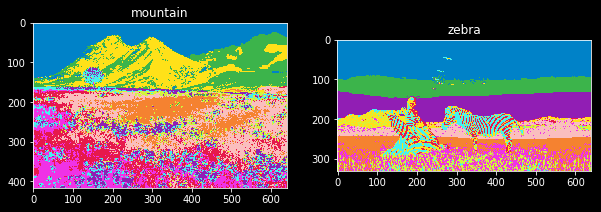

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_kmeans_lab)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_kmeans_lab)
plt.show()

# (b)

In [25]:

print(filterBank.shape)

(49, 49, 38)


In [138]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

def texture_segmentation(image_path):
    image = imageio.imread(image_path)
    image_gray = (rgb2gray(image)).astype(int)
    
    filterBank = scipy.io.loadmat('./Problem2/filterBank.mat')
    filterBank = filterBank["F"]
    filtered_map = []
    
    for i in range(38):
        filtered = convolve2d(image_gray, filterBank[:,:,i], mode="same", boundary="symm")
        filtered_map.append(filtered)
    filtered_map = np.rollaxis(np.array(filtered_map), 0,3)
    image_3d = filtered_map.reshape(-1,38)

    # leaning dictionary 
    kmeans = KMeans(n_clusters=6,max_iter=1000)
    kmeans.fit(image_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans

In [141]:
mountain_texture_seg = texture_segmentation("./Problem2/mountain.jpg")
zebra_texture_seg = texture_segmentation("./Problem2/zebra.jpg")

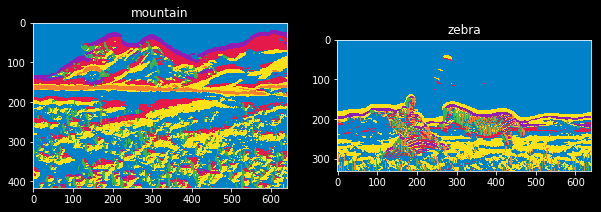

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_texture_seg)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_texture_seg)
plt.show()

# combine segmentation


In [145]:
def combine_segmentation(image_path):
    image = imageio.imread(image_path)
    image_3d_rgb = image.reshape(-1,3)
    
    image_gray = (rgb2gray(image)).astype(int)
    
    filterBank = scipy.io.loadmat('./Problem2/filterBank.mat')
    filterBank = filterBank["F"]
    filtered_map = []
    
    for i in range(38):
        filtered = convolve2d(image_gray, filterBank[:,:,i], mode="same", boundary="symm")
        filtered_map.append(filtered)
    filtered_map = np.rollaxis(np.array(filtered_map), 0,3)
    image_38d_texture = filtered_map.reshape(-1,38)
    image_41d = np.concatenate((image_3d_rgb,image_38d_texture),1)
    # leaning dictionary 
    kmeans = KMeans(n_clusters=6,max_iter=1000)
    kmeans.fit(image_41d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans

In [146]:
mountain_combine_seg = combine_segmentation("./Problem2/mountain.jpg")
zebra_combine_seg = combine_segmentation("./Problem2/zebra.jpg")

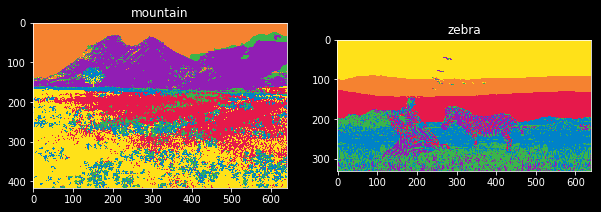

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_combine_seg)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_combine_seg)
plt.show()